In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pokemon_df = pd.read_csv('/content/Pokemon.csv')

In [3]:
pokemon_df.head(n=5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


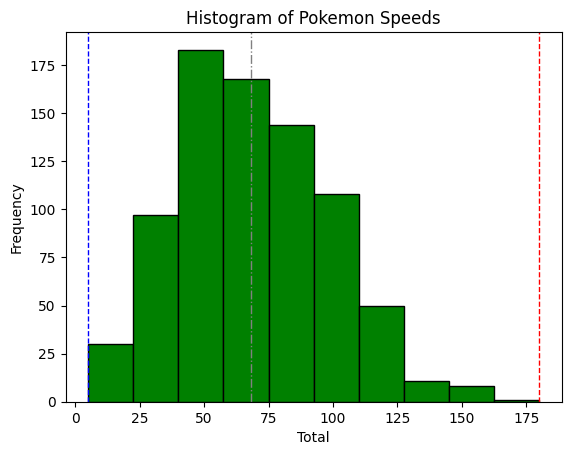

In [8]:
### Create a histogram of column 'Speed'

plt.hist(pokemon_df['Speed'], color = 'green', edgecolor = 'black')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.title('Histogram of Pokemon Speeds')

### Add to your histogram min, max, mean (average) lines

plt.axvline(pokemon_df["Speed"].mean(), color='grey', linestyle='dashdot', linewidth=1)
plt.axvline(pokemon_df["Speed"].max(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(pokemon_df["Speed"].min(), color='blue', linestyle='dashed', linewidth=1)


# CORRELATION

Text(0, 0.5, 'Defense')

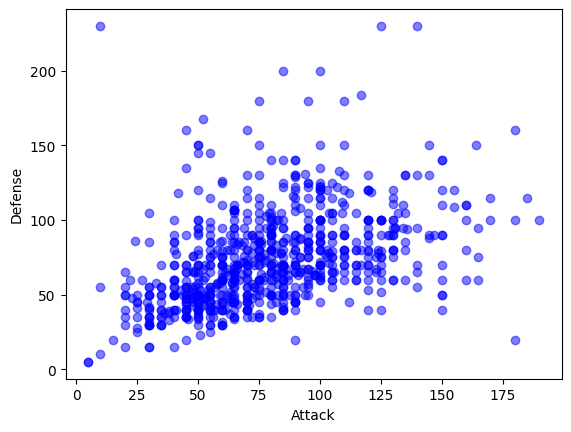

In [10]:
# scatter plot between variables: Attack and Defense

plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], color='blue', alpha=0.5)
plt.xlabel('Attack')
plt.ylabel('Defense')

Text(0.5, 1.0, 'Scatter plot')

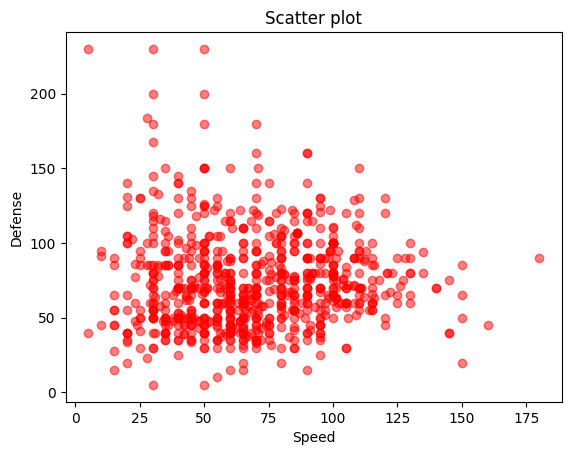

In [11]:
# scatterplot for variables: Speed and Defense
plt.scatter(pokemon_df['Speed'], pokemon_df['Defense'], color='red', alpha=0.5)
plt.xlabel('Speed')
plt.ylabel('Defense')
plt.title('Scatter plot')

Text(0.5, 1.0, 'Scatter plot')

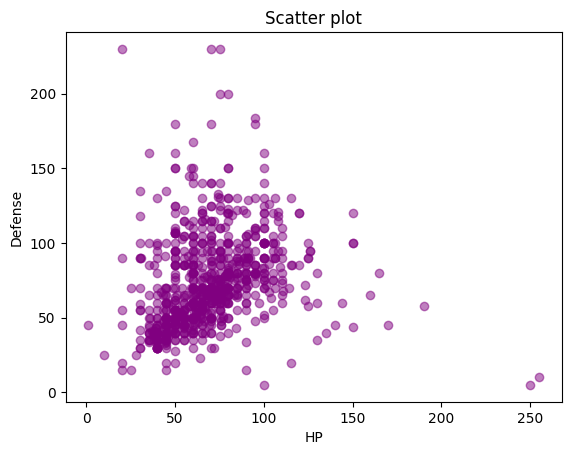

In [12]:
# scatterplot for variables: HP and Defense
plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color='purple', alpha=0.5)
plt.xlabel('HP')
plt.ylabel('Defense')
plt.title('Scatter plot')

### Pearson correlation

In [ ]:
# Result of this correlation calculation is between -1 and 1.
# -1 perfect negative relationship
# 1 perfect positive relationship

In [14]:
# Pearson correlation between Attack/Defense

correlation1 = pokemon_df['Attack'].corr(pokemon_df['Defense'])
correlation1

0.4386870551184892

In [15]:
# Pearson correlation between Speed/Defense

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
correlation2

0.015226598088597448

In [ ]:
# Select only numeric columns

numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop('#', axis=1)
numeric_columns

In [19]:
target_column = 'Attack'
correlation_results = {} #key = column, val=pearson_correlation

# for loop comparing target column and all other columns in the DataFrame

for col in numeric_columns.columns:
  if col =='Attack':
    continue
  correlation = pokemon_df[target_column].corr(pokemon_df[col])
  correlation_results[col] = correlation

correlation_results

{'Total': 0.7362106519949293,
 'HP': 0.422386028776223,
 'Defense': 0.4386870551184892,
 'Sp. Atk': 0.396361755349232,
 'Sp. Def': 0.26398955110108846,
 'Speed': 0.38123973924108967,
 'Generation': 0.051451336708469686}

# Correlation matrix

In [20]:
correlation_matrix = numeric_columns.corr() #all columns are numeric
correlation_matrix

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


# Visualizing with seaborn

In [21]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix')

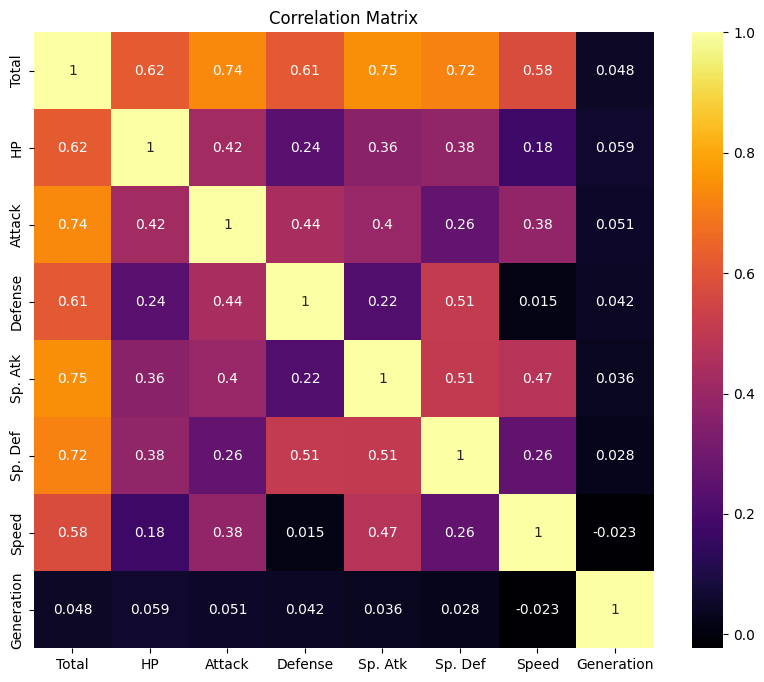

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="inferno") #annotation -adding values
plt.title('Correlation Matrix')

### Linear regression (predict one value based on the other)

<Axes: xlabel='Attack', ylabel='Defense'>

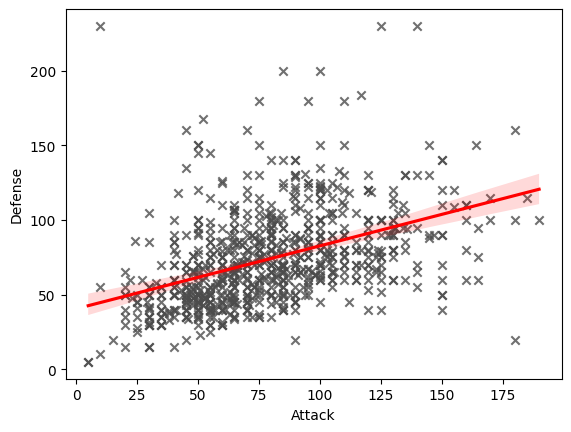

In [31]:
#sns.regplot(x = 'Attack', y='Defense', data=pokemon_df)

sns.regplot(
    data=pokemon_df, x='Attack', y="Defense",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)

Pearson correlation coefficient: 0.015226598088597448


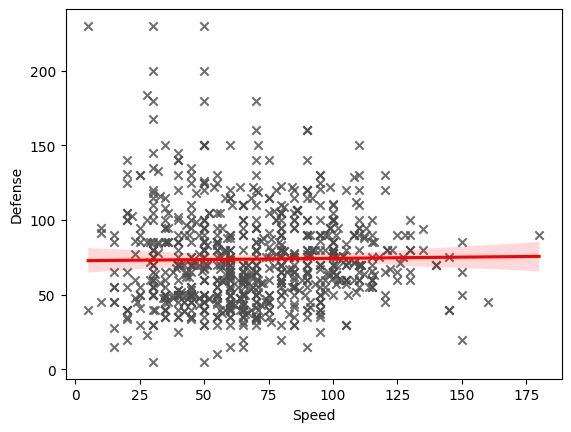

In [40]:
sns.regplot(
    data=pokemon_df, x='Speed', y="Defense", ci=99,marker="x", color=".3", line_kws={'color':"r"},
)

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation2)

Text(0.5, 1.0, 'Speed vs Defense')

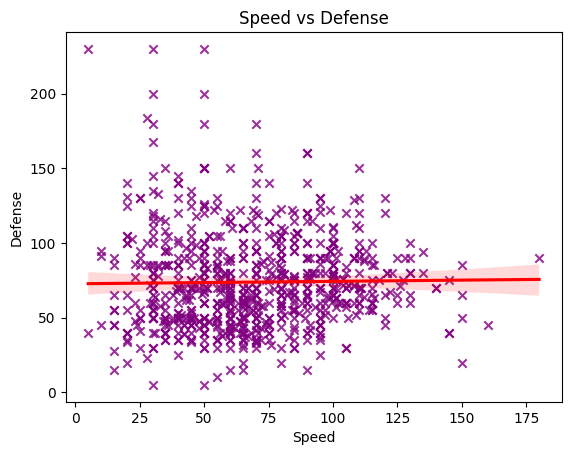

In [34]:
sns.regplot(x='Speed', y='Defense', data=pokemon_df, color='purple', ci=99, marker='x', line_kws={'color':'red'})
plt.title('Speed vs Defense')